In [75]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [76]:
import pandas as pd
df=pd.read_csv('happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [77]:
pd.set_option('display.max_rows',None)

In [78]:
df.shape

(158, 12)

In [79]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [80]:
#statistical summary 

df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [115]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Country']=LE.fit_transform(df['Country'])
df['Region']=LE.fit_transform(df['Region'])

In [116]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

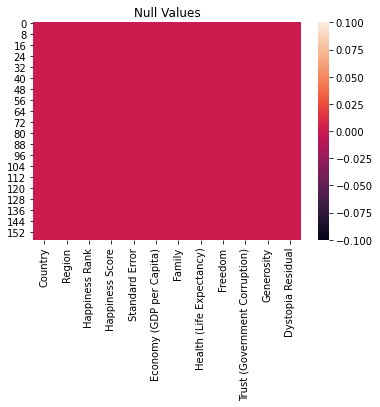

In [117]:
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

# Checking Correlation 

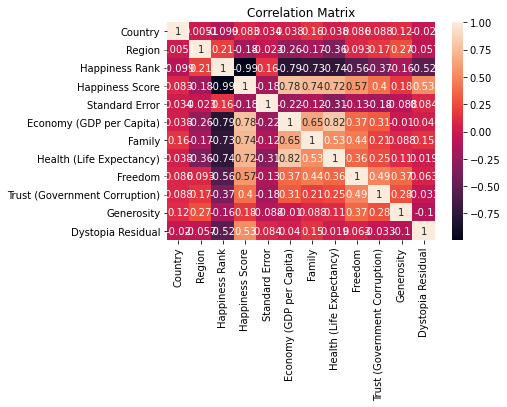

In [118]:
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

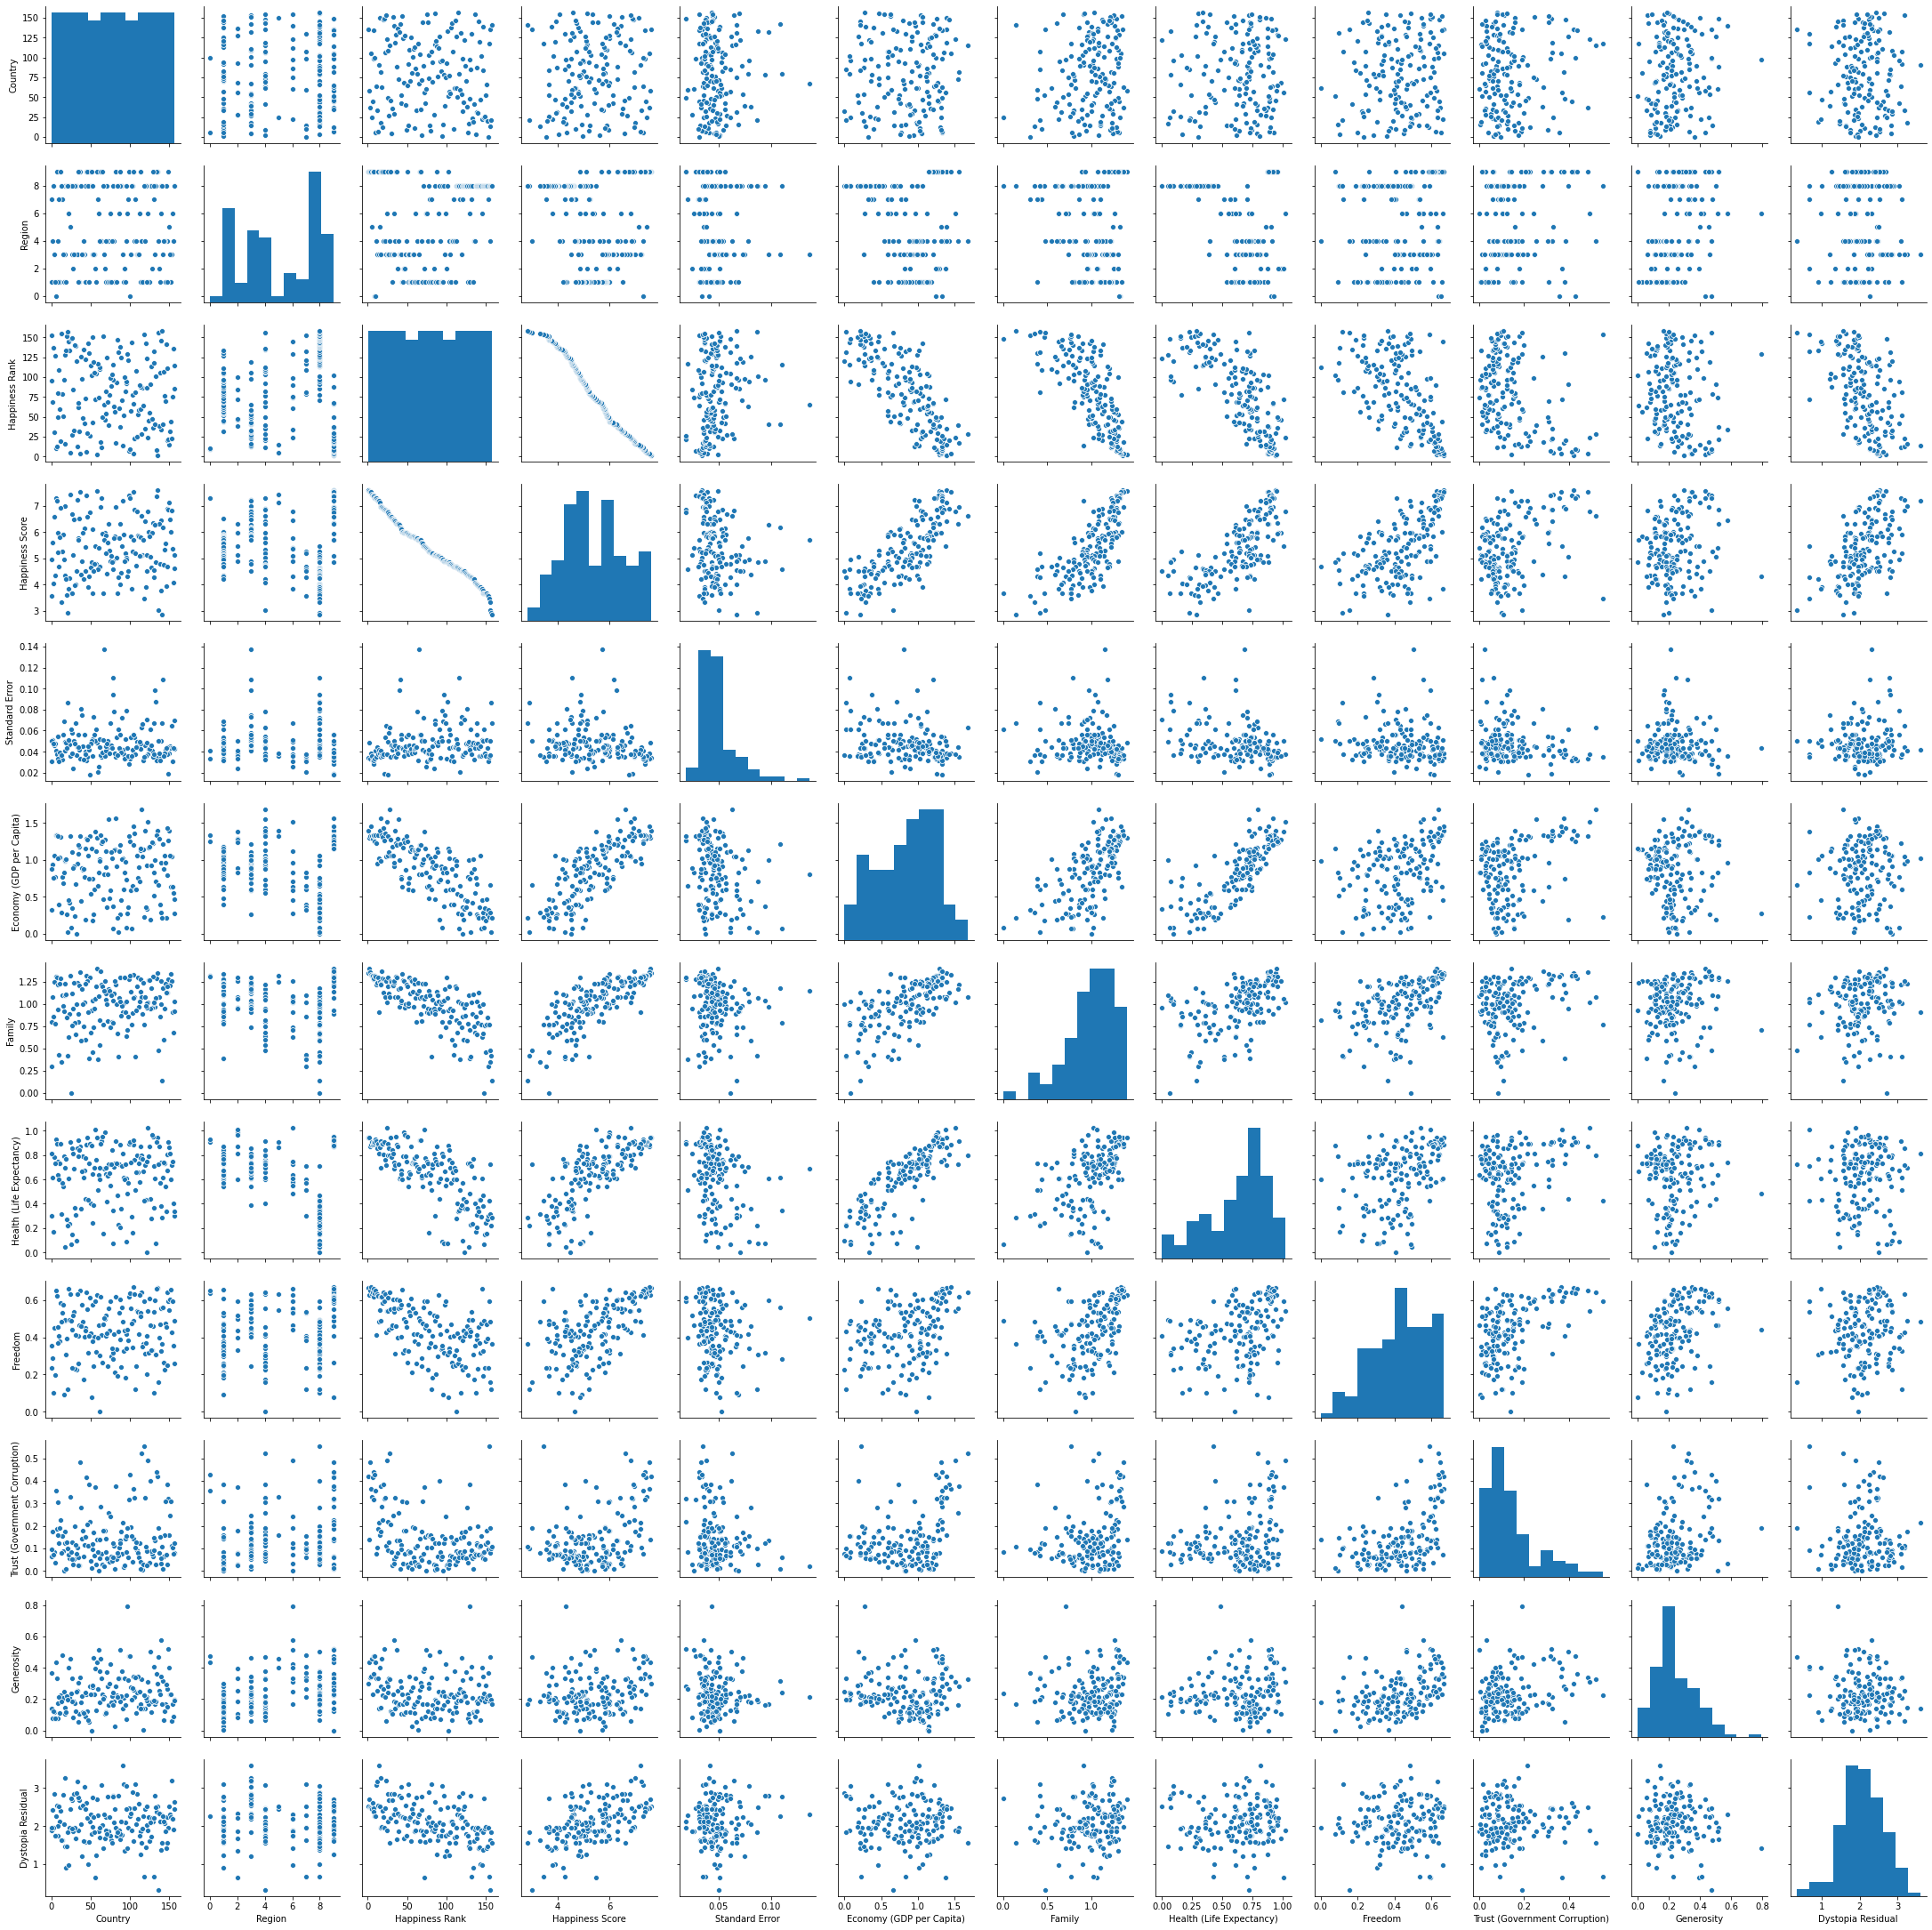

In [119]:
sns.pairplot(df)
plt.show()

In [120]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [121]:
corr_matrix=df.corr()
corr_matrix['Dystopia Residual'].sort_values(ascending=False)

Dystopia Residual                1.000000
Happiness Score                  0.530474
Family                           0.148117
Standard Error                   0.083981
Freedom                          0.062783
Economy (GDP per Capita)         0.040059
Health (Life Expectancy)         0.018979
Country                         -0.019778
Trust (Government Corruption)   -0.033105
Region                          -0.057276
Generosity                      -0.101301
Happiness Rank                  -0.521999
Name: Dystopia Residual, dtype: float64

In [152]:
x=df.drop('Dystopia Residual', axis =1)
y=df['Dystopia Residual']

In [136]:
x.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
dtype: float64

In [137]:
from sklearn.preprocessing import power_transform
df.new=power_transform(x)

df.new=pd.DataFrame(df.new,columns=x.columns)

In [138]:
df.new.skew()

Country                         -0.279791
Region                          -0.228041
Happiness Rank                  -0.264365
Happiness Score                 -0.027956
Standard Error                  -0.020092
Economy (GDP per Capita)        -0.127233
Family                          -0.169651
Health (Life Expectancy)        -0.183181
Freedom                         -0.080728
Trust (Government Corruption)    0.185965
Generosity                       0.013320
dtype: float64

In [151]:
x=df.new

In [156]:
x.shape

(158, 11)

In [155]:
y.shape

(158,)

# Checking for outliers 

<function matplotlib.pyplot.show(*args, **kw)>

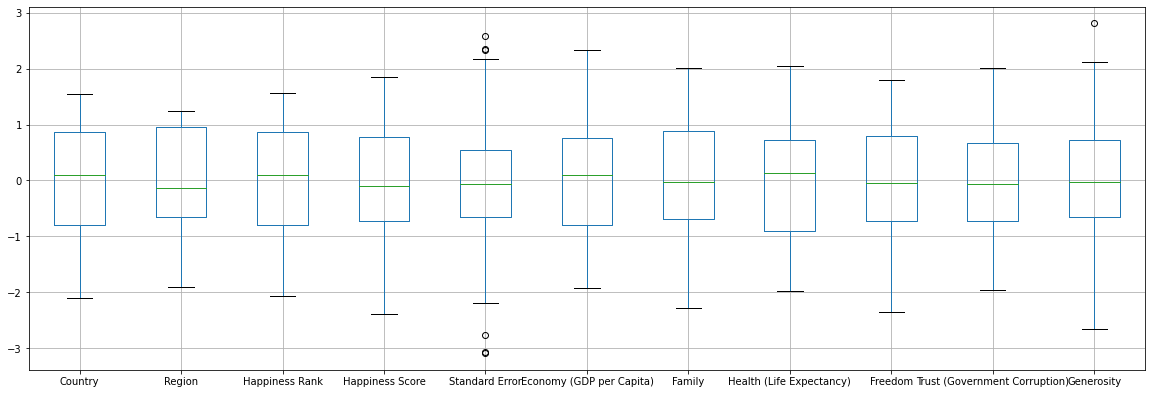

In [149]:
x.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=.25)
plt.show

We can see only few values, that too are close to whiskers. So these are nor outliers.

# Finding best random_state

In [148]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30, random_state =i)
    dtc=DecisionTreeClassifier() 
    dtc.fit(x_train, y_train)
    predrf=dtc.predict(x_test) 
    acc=accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

print("Best accuracy is ", maxAccu," on Random_state ", maxRS)

ValueError: Unknown label type: 'continuous'

# Creating train_test_split

In [157]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=130)

In [160]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
LR.score(x_train,y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

ValueError: Unknown label type: 'continuous'